In [ ]:
"""Decision Tree Classifier with Iris dataset"""
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

# split to 80% training, 20% validation
random.seed(0)
train_idx = random.sample([i for i in range(len(x))], int(0.8*len(x)))
validation_idx = [i for i in range(len(x)) if not i in train_idx]
print(f'traing dataset is {train_idx}')
print(f'testing dataset is {validation_idx}')

# train and validation idx cover the full range of possible idx [0, 149]
print(sorted(train_idx + validation_idx) == [i for i in range(len(x))])

# 'train' for traing dataset
# x_train for training features(SL, SW, PL, PW)
# y_train for training labels(species)
x_train, y_train = x[train_idx], y[train_idx]

# 'validation' for testing dataset
# x_validation for testing features(SL, SW, PL, PW)
# y_validation for testing labels(species)
x_validation, y_validation = x[validation_idx], y[validation_idx]

traing dataset is [98, 107, 10, 66, 130, 124, 103, 77, 122, 91, 55, 129, 35, 72, 137, 24, 64, 37, 79, 25, 18, 84, 120, 71, 12, 45, 139, 40, 78, 81, 116, 26, 70, 61, 56, 110, 146, 33, 7, 143, 117, 1, 11, 92, 51, 90, 100, 85, 80, 0, 121, 63, 42, 31, 93, 41, 104, 8, 134, 136, 28, 30, 138, 69, 57, 148, 147, 141, 65, 62, 13, 38, 109, 132, 15, 142, 97, 86, 118, 74, 36, 115, 128, 49, 82, 88, 76, 67, 125, 52, 101, 2, 39, 73, 16, 133, 4, 5, 43, 48, 106, 9, 58, 60, 44, 34, 105, 145, 112, 17, 94, 75, 131, 126, 127, 89, 96, 22, 46, 83]
testing dataset is [3, 6, 14, 19, 20, 21, 23, 27, 29, 32, 47, 50, 53, 54, 59, 68, 87, 95, 99, 102, 108, 111, 113, 114, 119, 123, 135, 140, 144, 149]
True


In [ ]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

In [ ]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

In [ ]:
model = clf.fit(x_train,y_train)

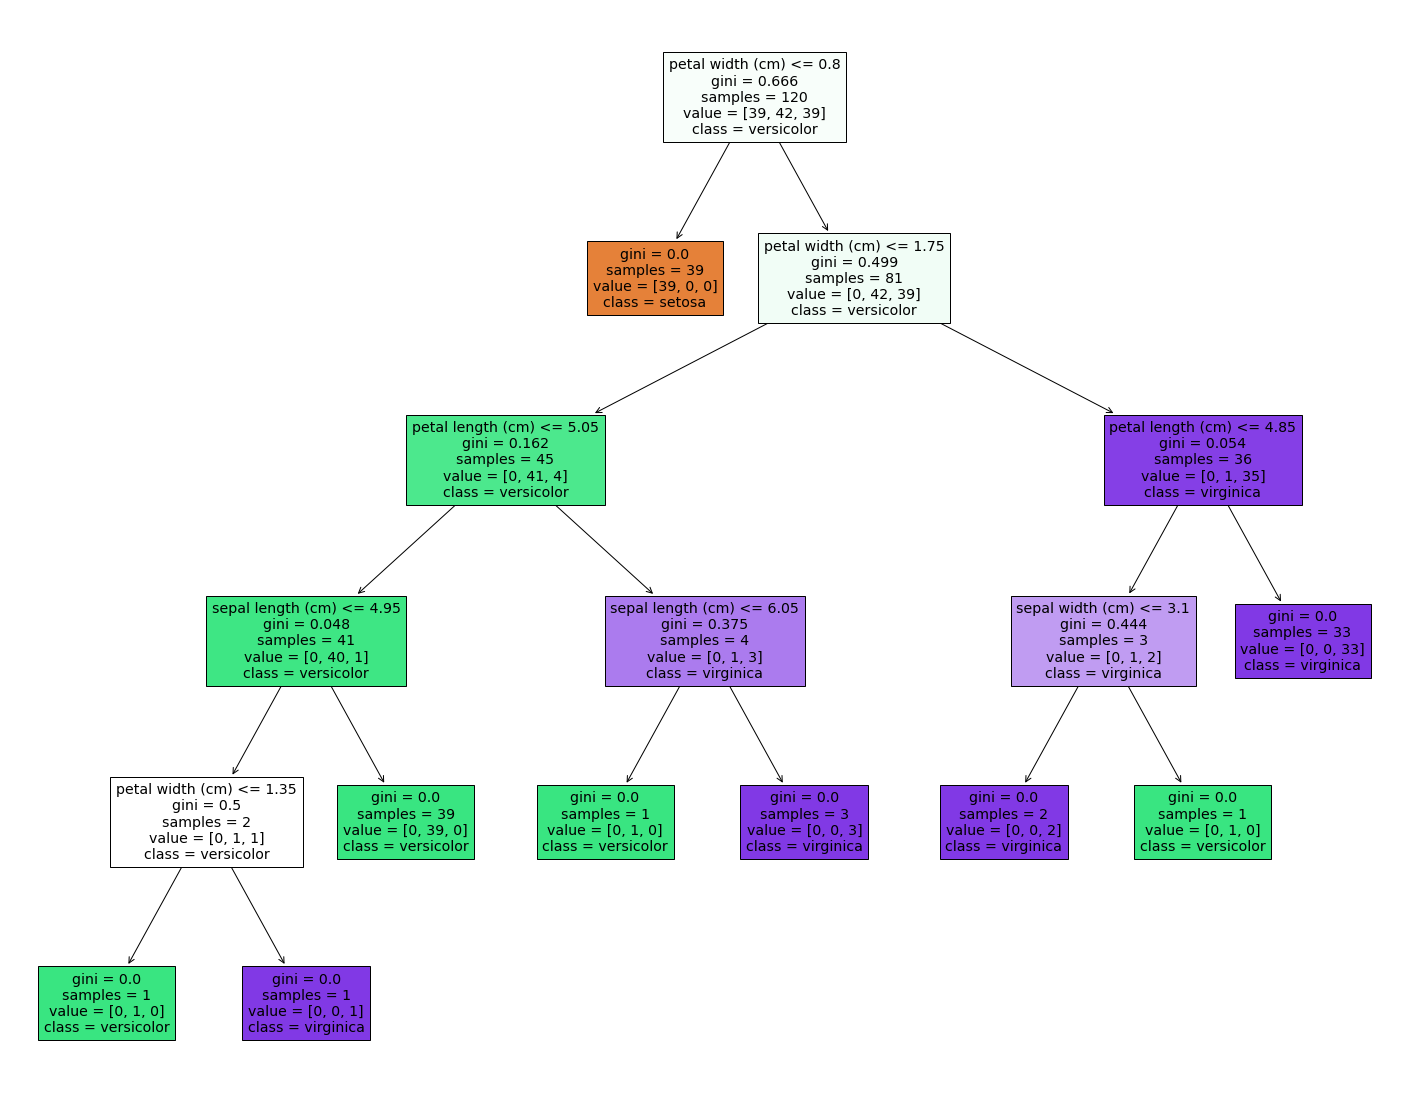

In [ ]:
text_representation = tree.export_text(clf)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
# try it out with some random data
observation = [[5, 4, 3, 2]]

In [ ]:
# Predict observation's class    
model.predict(observation)
# ['setosa','versicolor','virginica']

array([1])

In [ ]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)
# ['setosa','versicolor','virginica']

array([[0., 1., 0.]])

In [ ]:
# Let's look at some predictions for the input training data:
for i,obs in enumerate(x_train):

  #print(model.predict_proba(obs.reshape(1,-1)))
  pred = model.predict(obs.reshape(1,-1))
  print(f'({i})'.ljust(5) + ' | ' + ''.join('{}: {} | '.format(*k) for k in zip(data1.columns[:4], obs)) 
        + f'species: {y_train[i]} | '
        + f'prediction: {pred[0]} | '
        #+ f'predict_proba: {model.predict_proba(obs.reshape(1,-1))} | '
        + ('(Correct)'.ljust(len('Incorrect')) if y_train[i] == pred else '(Incorrect)') )
  
# Notably, all leaves of the decision classifier tree show Gini impurity of 0, so all predictions using the training data are correct

(0)   | sepal length (cm): 5.1 | sepal width (cm): 2.5 | petal length (cm): 3.0 | petal width (cm): 1.1 | species: 1 | prediction: 1 | (Correct)
(1)   | sepal length (cm): 7.3 | sepal width (cm): 2.9 | petal length (cm): 6.3 | petal width (cm): 1.8 | species: 2 | prediction: 2 | (Correct)
(2)   | sepal length (cm): 5.4 | sepal width (cm): 3.7 | petal length (cm): 1.5 | petal width (cm): 0.2 | species: 0 | prediction: 0 | (Correct)
(3)   | sepal length (cm): 5.6 | sepal width (cm): 3.0 | petal length (cm): 4.5 | petal width (cm): 1.5 | species: 1 | prediction: 1 | (Correct)
(4)   | sepal length (cm): 7.4 | sepal width (cm): 2.8 | petal length (cm): 6.1 | petal width (cm): 1.9 | species: 2 | prediction: 2 | (Correct)
(5)   | sepal length (cm): 6.7 | sepal width (cm): 3.3 | petal length (cm): 5.7 | petal width (cm): 2.1 | species: 2 | prediction: 2 | (Correct)
(6)   | sepal length (cm): 6.3 | sepal width (cm): 2.9 | petal length (cm): 5.6 | petal width (cm): 1.8 | species: 2 | prediction:

In [ ]:
# how does the model do for the validation data set?
for i,obs in enumerate(x_validation):
  pred = model.predict(obs.reshape(1,-1))
  print(f'({i})'.ljust(5) + ' | ' + ''.join('{}: {} | '.format(*k) for k in zip(data1.columns[:4], obs)) 
        + f'species: {y_validation[i]} | '
        + f'prediction: {pred[0]} | '
        + ('(Correct)'.ljust(len('Incorrect')) if y_validation[i] == pred else '(Incorrect)') )

(0)   | sepal length (cm): 4.6 | sepal width (cm): 3.1 | petal length (cm): 1.5 | petal width (cm): 0.2 | species: 0 | prediction: 0 | (Correct)
(1)   | sepal length (cm): 4.6 | sepal width (cm): 3.4 | petal length (cm): 1.4 | petal width (cm): 0.3 | species: 0 | prediction: 0 | (Correct)
(2)   | sepal length (cm): 5.8 | sepal width (cm): 4.0 | petal length (cm): 1.2 | petal width (cm): 0.2 | species: 0 | prediction: 0 | (Correct)
(3)   | sepal length (cm): 5.1 | sepal width (cm): 3.8 | petal length (cm): 1.5 | petal width (cm): 0.3 | species: 0 | prediction: 0 | (Correct)
(4)   | sepal length (cm): 5.4 | sepal width (cm): 3.4 | petal length (cm): 1.7 | petal width (cm): 0.2 | species: 0 | prediction: 0 | (Correct)
(5)   | sepal length (cm): 5.1 | sepal width (cm): 3.7 | petal length (cm): 1.5 | petal width (cm): 0.4 | species: 0 | prediction: 0 | (Correct)
(6)   | sepal length (cm): 5.1 | sepal width (cm): 3.3 | petal length (cm): 1.7 | petal width (cm): 0.5 | species: 0 | prediction:

In [ ]:
# So the example our model predict as incorrect is :
# sepal length (cm): 6.0 | sepal width (cm): 2.2 | petal length (cm): 5.0 | petal width (cm): 1.5 | species: 2 | prediction: 1 | (Incorrect)
print('For species 2 in training dataset:\n mean '
      + '\n mean '.join('{:19}: {}'.format(*_) for _ in [(label, data1.iloc[train_idx].loc[data1['species'] == 2][label].mean()) for label in data1.columns[:4]] ).ljust(25))
print(' stdev '
      +'\n stdev '.join('{:18}: {}'.format(*_) for _ in [(label, data1.iloc[train_idx].loc[data1['species'] == 2][label].std()) for label in data1.columns[:4]] ).ljust(25))

For species 2 in training dataset:
 mean sepal length (cm)  : 6.625641025641025
 mean sepal width (cm)   : 3.0230769230769226
 mean petal length (cm)  : 5.592307692307692
 mean petal width (cm)   : 2.0205128205128196
 stdev sepal length (cm) : 0.6463329550618013
 stdev sepal width (cm)  : 0.30989093027058345
 stdev petal length (cm) : 0.5814612334385697
 stdev petal width (cm)  : 0.2647535966452055


In [ ]:
# mean -/+ 2 sigma covers 95% of the population

# sepal length
minSL = round(6.625641025641025 - 2 * (0.6463329550618013),2)
maxSL = round(6.625641025641025 + 2 * (0.6463329550618013),2)
print('\nsepal length (cm): 6.0') 
print(f'95% of sepal length is in {minSL} to {maxSL}')

# sepal width
minSW = round(3.0230769230769226 - 2 * (0.30989093027058345),2)
maxSW = round(3.0230769230769226 + 2 * (0.30989093027058345),2)
print('\n!!sepal width (cm): 2.2') 
print(f'95% of sepal width is in {minSW} to {maxSW}')

# petal length
minPL = round(5.592307692307692 - 2 * (0.5814612334385697),2)
maxPL = round(5.592307692307692 + 2 * (0.5814612334385697),2)
print('\npetal length (cm): 5.0') 
print(f'95% of petal length is in {minPL} to {maxPL}')

# petal width
minPW = round(2.0205128205128196 - 2 * (0.2647535966452055),2)
maxPW = round(2.0205128205128196 + 2 * (0.2647535966452055),2)
print('\npetal width (cm): 1.5') 
print(f'95% of petal width is in {minPW} to {maxPW}')



sepal length (cm): 6.0
95% of sepal length is in 5.33 to 7.92

!!sepal width (cm): 2.2
95% of sepal width is in 2.4 to 3.64

petal length (cm): 5.0
95% of petal length is in 4.43 to 6.76

petal width (cm): 1.5
95% of petal width is in 1.49 to 2.55


In [ ]:
# Note that the failing case has:
#     - sepal width 2.2 cm
# So this is an outlier case, and comparing in the decision tree printout we can
# see the misclassification happens exactly at the test of sepal width <= 3.1 cm

# 1 sigma, 2 sigma, 3 sigma 'rule'
# 68–95–99.7 rule
# integral of bell curve from -1*sigma to +1*sigma = 0.68
# integral of bell curve from -2*sigma to +2*sigma = 0.95
# integral of bell curve from -3*sigma to +3*sigma = 0.997